In [ ]:
import os
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
std_accuracy = [0.056, 0.082, 0.049, 0.092, 0.073, 0.089, 0.045, 0.091, 0.074, 0.075, 0.057, 0.098, 0.081, 0.096, 0.059, 0.10, 0.077, 0.082, 0.091, 0.12]

In [ ]:
# Get the list of all files and directories
path_1 = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\PhD\2nd year\Results\Sentiment\best\Contextual"

#ablation_path = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\PhD\2nd year\Results\NER\Ablation\Run_1"
dir_list = os.listdir(path_1)
#ablation_dir_list = os.listdir(ablation_path)

In [20]:
def read_file(read_in_path):
    #Open the text file for reading
    with open(read_in_path, 'r') as file:
        # Read the content of the file
        content = file.read()

        # Search for the line containing "Test Accuracy:"
        line = content.split('\n')
        for l in line:
            if "Test Accuracy:" in l:
                # Extract the value following "Test Accuracy:"
                accuracy_str = l.split(':')[1].strip()
                # Convert the extracted value to float
                accuracy = float(accuracy_str)
                break

    return accuracy

In [21]:
def create_df(list_of_dir, read_in_path):
    list_of_dfs = []
    for dir in list_of_dir:

        if dir != "std.csv":
            # Get the full path of the file
            file_path = os.path.join(read_in_path, dir)

            if "15" in dir:
                aug_size = 15
            elif "25" in dir:
                aug_size = 25
            elif "50" in dir:
                aug_size = 50
            elif "75" in dir:
                aug_size = 75
            elif "100" in dir:
                aug_size = 100
            elif "10" in dir:
                aug_size = 10
            elif "5" in dir:
                aug_size = 5
            elif "20" in dir:
                aug_size = 20
            else:
                aug_size = 0

            if "Noise" in dir:
                model = "Noise"
            elif "DCGAN_v2_Text" in dir:
                model = "DCGAN_v2_Text"

            if "random" in dir:
                aug_type = "random"
            elif "TF-IDF-Low" in dir:
                aug_type = "TF-IDF-Low"
            elif "TF-IDF-High" in dir:
                aug_type = "TF-IDF-High"
            elif "TF-IDF-Medium" in dir:
                aug_type = "TF-IDF-Medium"
            else:
                aug_type = "None"

            # Read the file
            accuracy = read_file(file_path)

            df = pd.DataFrame([accuracy], columns=["accuracy"])
            df["augmentation_size"] = aug_size
            df["model"] = model
            df["augmentation_type"] = aug_type

            list_of_dfs.append(df)

    return pd.concat(list_of_dfs, ignore_index=True)

In [22]:
#create ablation and normal df
df_1 = create_df(dir_list, path_1)

In [23]:

# Group by augmentation size, augmentation type, and model, and calculate the average accuracy and standard deviation
grouped_df = df_1.groupby(['augmentation_size', 'augmentation_type', 'model'])['accuracy'].agg(['mean', 'std']).reset_index()
# Rename columns for clarity
grouped_df.rename(columns={'mean': 'avg_accuracy', 'std': 'std_accuracy'}, inplace=True)


In [24]:
#grouped df remove augentation sizes 50, 75, and 100
grouped_df = grouped_df[grouped_df['augmentation_size'] != 50]
grouped_df = grouped_df[grouped_df['augmentation_size'] != 75]
grouped_df = grouped_df[grouped_df['augmentation_size'] != 100]
grouped_df = grouped_df[grouped_df['augmentation_size'] != 0]
grouped_df['std_accuracy'] = std_accuracy


In [25]:
grouped_df

,augmentation_size,augmentation_type,model,avg_accuracy,std_accuracy
1,5,TF-IDF-High,DCGAN_v2_Text,0.7678,0.056
2,5,TF-IDF-Low,DCGAN_v2_Text,0.7682,0.082
3,5,TF-IDF-Medium,DCGAN_v2_Text,0.7892,0.049
4,5,random,DCGAN_v2_Text,0.7781,0.092
5,10,TF-IDF-High,DCGAN_v2_Text,0.7812,0.073
6,10,TF-IDF-Low,DCGAN_v2_Text,0.7921,0.089
7,10,TF-IDF-Medium,DCGAN_v2_Text,0.8210,0.045
8,10,random,DCGAN_v2_Text,0.8102,0.091
9,15,TF-IDF-High,DCGAN_v2_Text,0.7820,0.074
10,15,TF-IDF-Low,DCGAN_v2_Text,0.7768,0.075


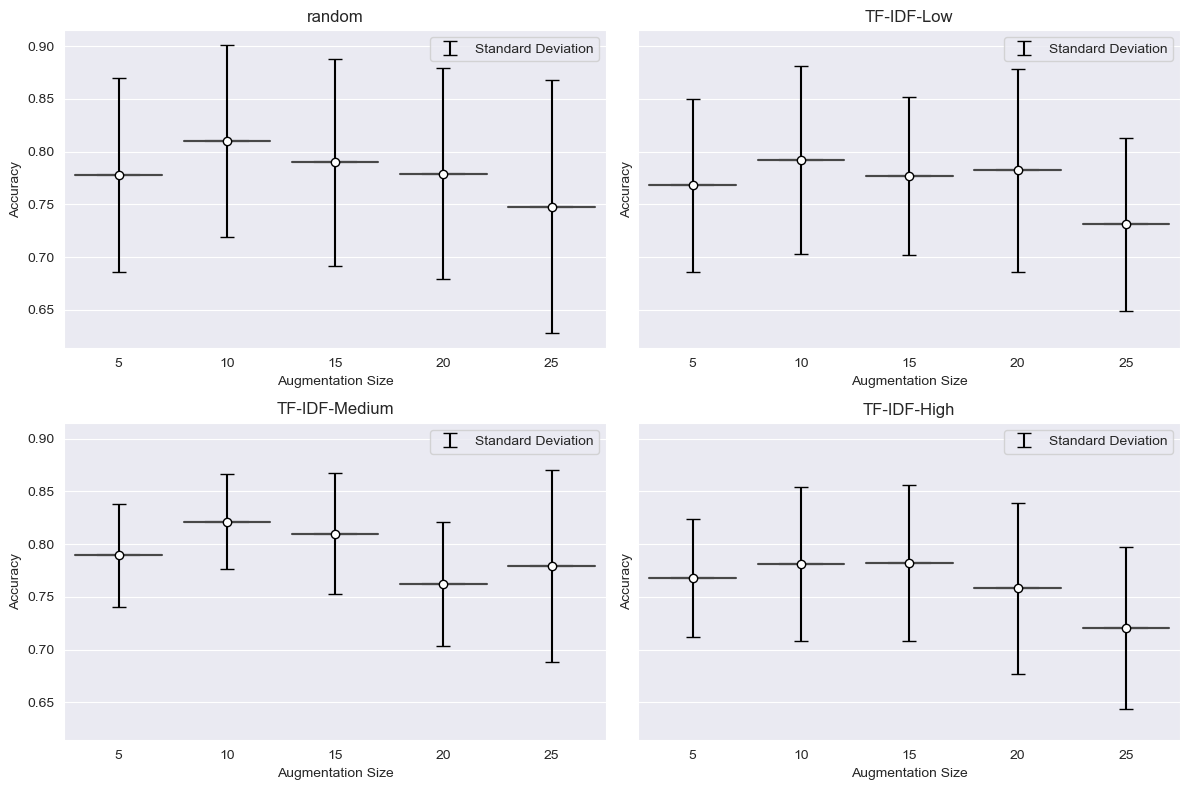

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define augmentation types
augmentation_types = ['random', 'TF-IDF-Low', 'TF-IDF-Medium', 'TF-IDF-High']

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

# Iterate over each subplot and augmentation type
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        # Filter data for the current augmentation type
        current_augmentation = augmentation_types[i*2 + j]
        filtered_df = grouped_df[grouped_df['augmentation_type'] == current_augmentation]

        # Plot box plot with error bars representing standard deviation
        sns.boxplot(x='augmentation_size', y='avg_accuracy', data=filtered_df, ax=ax, palette='Set1', showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})

        # Plot error bars representing standard deviation
        x = range(len(filtered_df['augmentation_size'].unique()))
        ax.errorbar(x, filtered_df.groupby('augmentation_size')['avg_accuracy'].mean(), yerr=filtered_df['std_accuracy'], fmt='none', ecolor='black', capsize=5, label='Standard Deviation')

        # Set titles and labels
        ax.set_title(current_augmentation)
        ax.set_xlabel('Augmentation Size')
        ax.set_ylabel('Accuracy')

        # Set x-axis ticks to show only specific augmentation sizes
        ax.set_xticks(x)
        ax.set_xticklabels(filtered_df['augmentation_size'].unique())

        # Add legend
        ax.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [27]:
#average accuracy for each augmentation size with standard deviation
grouped_df.groupby('augmentation_size')['avg_accuracy'].agg(['mean', 'std'])

,mean,std
augmentation_size,,
5,0.775825,0.010110
10,0.801125,0.017850
15,0.789725,0.014582
20,0.770325,0.011928
25,0.744750,0.025593


In [28]:
#average accuracy for each augmentation type with standard deviation
grouped_df.groupby('augmentation_type')['avg_accuracy'].agg(['mean', 'std'])

,mean,std
augmentation_type,,
TF-IDF-High,0.76198,0.025112
TF-IDF-Low,0.77008,0.023397
TF-IDF-Medium,0.79232,0.023599
random,0.78102,0.022641
